----
# Układy regulacji automatycznej
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów Wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej 

## 0. Zagadnienia do opanowania przed zajęciami
* znajomość znajdowania odpowiedzi skokowej oraz impulsowej układu o zadanej transmitancji
* rozkład zadanej transmitancji na ułamki proste
* obliczenie transformaty odwrotnej Laplace'a
* znajomość transmitancji poszczególnych rodzajów regulatorów (P,PI,PD,PID)


<img style="background-color:grey;" src="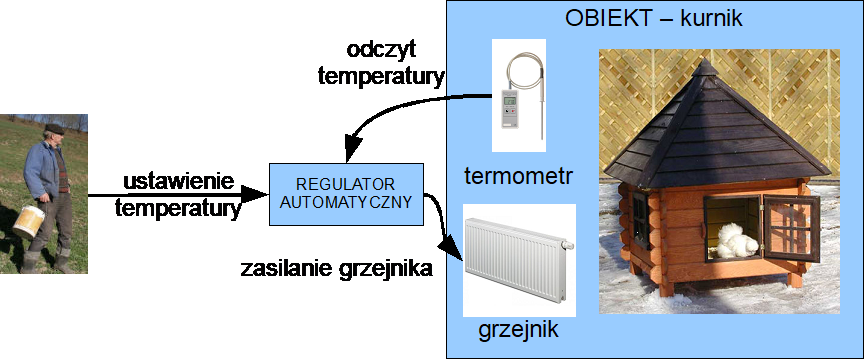
">

In [121]:
%matplotlib inline
import sympy 
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
default_figsize=(12, 6)
poles_figsize  =( 6, 6)

---- 
## Układ sterowany i regulatory
---- 
Transmitancja układu:
$$ H_0(s) = {{1} \over {s^2 + 10s + 20}} $$
Regulatory:  
* regulator proporcjonalny P (P1): $ k_p=300 $  
* regulator proporcjonalny P (P2): $ k_p=600 $  
* regulator proporcjonalno całkujący PI: $ k_p=30, k_i=70 $  
* regulator proporcjonalno różniczkujący PD: $ k_p=300, k_d=10 $  
* regulator proporcjonalno całkująco różniczkujący PID: $ k_p=300, k_i=300, k_d=50 $  

In [122]:
#declare symbolic variable 's' and 't'
s  = sympy.symbols('s', cpmplex = True)
t  = sympy.symbols('t', real    = True, positive = True)

#declare system transmitance
H0 = 1 /(s**2 + 10*s + 20)

#declare regulators (use dict() and list() types)
Regulators = { "P1"  : [300,   0,  0],
               "P2"  : [600,   0,  0],
               "PI"  : [ 30,  70,  0],
               "PD"  : [300,   0, 10],
               "PID" : [350, 300, 50]}

---- 
## 1. Dla podanego układu $H_0(s)$ i regulatorów (P1, P2, PI, PD, PID) wyznacz
---- 
### 1.1. Transmitancję regulatora $H_r(s)$
$$H_r(s) = k_p + {k_i \over s} + k_d \cdot s $$
### 1.2. Transmitancję całego układu $H(s)$
$$H(s) = {H_r(s) \cdot H_0(s) \over {1 + H_r(s) \cdot H_0(s)}} $$
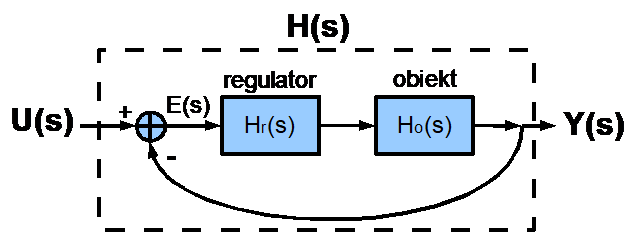

### 1.3. Transmitancję uchybową $H_e(s)$
$$H_e(s) = {1 \over {1 + H_r(s) \cdot H_0(s)}} $$
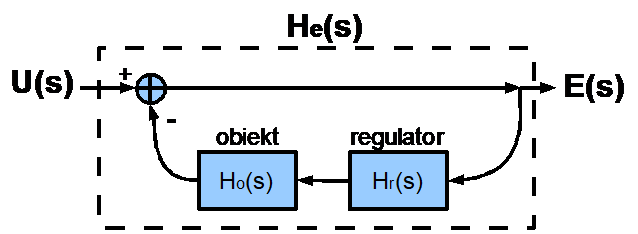

### 1.4. Błąd statyczny $e(t \to \infty)$
(Liczymy go dla przypadku, gdy $u(t)$ to skok jednostkowy, wtedy $U(s) = {1\over{s}}$)
$$ \lim_{t \to \infty}e(t) = \lim_{s \to 0} s \cdot E(s) = \lim_{s \to 0} s \cdot H_e(s) \cdot U(s) = \lim_{s \to 0} s \cdot H_e(s) \cdot {1\over{s}} = \lim_{s \to 0} H_e(s) $$

Podpowiedź: użyj `sympy.limit`, `sympy.cancel`

In [123]:
for Name, Regulator in Regulators.items():
    print("regulator " + Name + " " + str(Regulator))
    kp, ki, kd = Regulator
    #determine Hr
    Hr = kp + (ki/s) + (kd*s)

    #determine H
    H = (Hr*H0)/(1+(Hr*H0))

    #determine He
    He = (1)/(1+(Hr*H0))

    #determine e
    e = sympy.limit(He, s, 0)

    #display Hr, H, He and e
    display(sympy.cancel(Hr))
    display(sympy.cancel(H))
    display(sympy.cancel(He))
    display(sympy.cancel(e))

regulator P1 [300, 0, 0]


300

300/(s**2 + 10*s + 320)

(s**2 + 10*s + 20)/(s**2 + 10*s + 320)

1/16

regulator P2 [600, 0, 0]


600

600/(s**2 + 10*s + 620)

(s**2 + 10*s + 20)/(s**2 + 10*s + 620)

1/31

regulator PI [30, 70, 0]


(30*s + 70)/s

(30*s + 70)/(s**3 + 10*s**2 + 50*s + 70)

(s**3 + 10*s**2 + 20*s)/(s**3 + 10*s**2 + 50*s + 70)

0

regulator PD [300, 0, 10]


10*s + 300

(10*s + 300)/(s**2 + 20*s + 320)

(s**2 + 10*s + 20)/(s**2 + 20*s + 320)

1/16

regulator PID [350, 300, 50]


(50*s**2 + 350*s + 300)/s

(50*s**2 + 350*s + 300)/(s**3 + 60*s**2 + 370*s + 300)

(s**3 + 10*s**2 + 20*s)/(s**3 + 60*s**2 + 370*s + 300)

0

---- 
## 2. Dla podanego układu $H_0(s)$ i regulatorów (P!, P2, PI, PD, PID) wyznacz odpowiedź skokową układu
---- 
Podpowiedź: odpowiedź skokową wyznaczamy na podstawie transmitancji całego układu $H(s)$  
Podpowiedź: skorzystaj z funkcji `calculateStepResponseFromSympyH(H, time)`

In [124]:
def calculateStepResponseFromNumDen(B, A, TimeDomain):
    step = scipy.signal.step(scipy.signal.tf2ss(B, A), T=TimeDomain)[1]
    return step

def calculateStepResponseFromSympyH(H, TimeDomain):
    B,A = sympy.fraction(H.simplify())
    B = [float(i) for i in sympy.Poly(B, s).all_coeffs()]
    A = [float(i) for i in sympy.Poly(A, s).all_coeffs()]
    step = calculateStepResponseFromNumDen(B, A, TimeDomain)
    return step

C:\Users\pient\AppData\Local\Temp\ipykernel_3612\2474450933.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


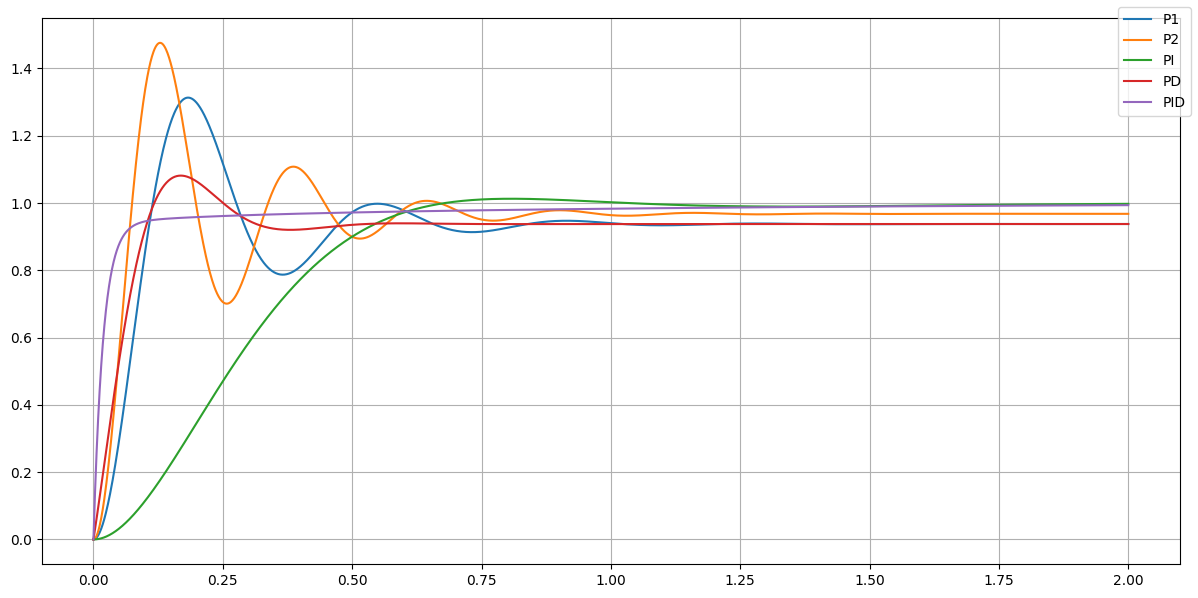

In [125]:
fig, ax = plt.subplots(1, 1, figsize=default_figsize)
time = np.linspace(0, 2, 2000)

for Name, Regulator in Regulators.items():  
    kp, ki, kd = Regulator
    #determine Hr
    Hr = kp + (ki/s) + (kd*s)

    #determine H
    H = (Hr*H0)/(1+(Hr*H0))
    
    #calculate step response
    step = calculateStepResponseFromSympyH(H, time)
    
    #add step response to plot, add label
    ax.plot(time, step, label=Name)
    
    
#make prety plot
ax.grid()
fig.legend()
fig.tight_layout()
fig.show()


---- 
## 3. Sprawdź, jak wzmocnienie członu całkującego wpływa na transmitancję układu
---- 
### 3.1. Wyznacz odpowiedź skokową, błąd regulacji i błąd statyczny dla obiektu o transmitancji:
$$ H_0(s) = {{1} \over {0.5 s^2 + 6s + 10}} $$
przy zastosowaniu regulatora PID: $kp=100; ki=1; kd=1$  
oceń działanie regulatora
### 3.2. Następnie zmień $ki$ na $ki=200$
oceń działanie regulatora
### 3.3. Spróbuj dobrać taką wartość $kd$ aby zredukować przeregulowanie i skrócić czas ustalania się odpowiedzi układu


0

C:\Users\pient\AppData\Local\Temp\ipykernel_3612\47881546.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


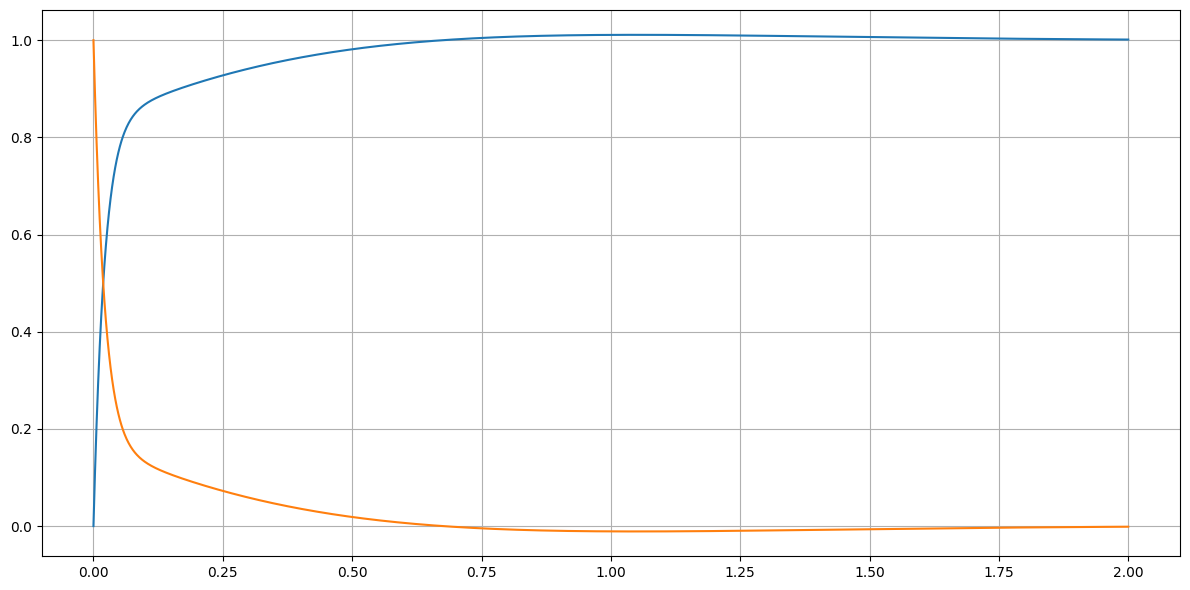

In [126]:
H0 = 1 /(0.5*s**2 + 6*s + 10)
kp = 100
ki = 200
kd = 20
#determine Hr
Hr = kp + (ki/s) + (kd*s)

#determine H
H = (Hr*H0)/(1+(Hr*H0))

#calculate and plot step response
fig, ax = plt.subplots(1, 1, figsize=default_figsize)
step = calculateStepResponseFromSympyH(H, time)
ax.plot(time, step)

# determine static error
He = (1)/(1+(Hr*H0))
e = sympy.limit(He, s, 0)
display(sympy.cancel(e))

# calculate regulation error
ax.plot(time, 1-step)

ax.grid()
fig.tight_layout()
fig.show()

---- 
## 4. Jak zastosowanie poszczególnych członów wpływa na charakter i cechy odpowiedzi skokowej układu i błąd statyczny?
---- 

---- 
## 5. Sprawdź, jak wzmocnienie członu całkującego wpływa na stabilność układu
---- 
Skoro człon P stwarza najmniej problemów – jest najprostszy w implementacji, to dlaczego po prostu nie wziąć regulatora P z dużym wzmocnieniem? Nie zawsze daje to pożądane rezultaty.
### 5.1. Wyznacz odpowiedź skokową dla obiektu o transmitancji:
$$ H_o(s) = {{1} \over {s^3 + 10s^2 + 20s + 100}} $$
przy zastosowaniu regulatora P: $kp=90$
### 5.2. Wyznacz położenie biegunów układu (narysuj wykres)
Podpowiedź: skorzystaj z funkcji `calculatePolesFromSympyH(H, time)`
### 5.3. Spróbuj poprawić działanie układu poprzez zmianę parametru $kp$



In [127]:
def calculatePolesFromSympyH(H):
    B,A = sympy.fraction(H)
    B = [float(i) for i in sympy.Poly(B, s).all_coeffs()]
    A = [float(i) for i in sympy.Poly(A, s).all_coeffs()]
    return np.roots(A)

C:\Users\pient\AppData\Local\Temp\ipykernel_3612\2761643106.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\pient\AppData\Local\Temp\ipykernel_3612\2761643106.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


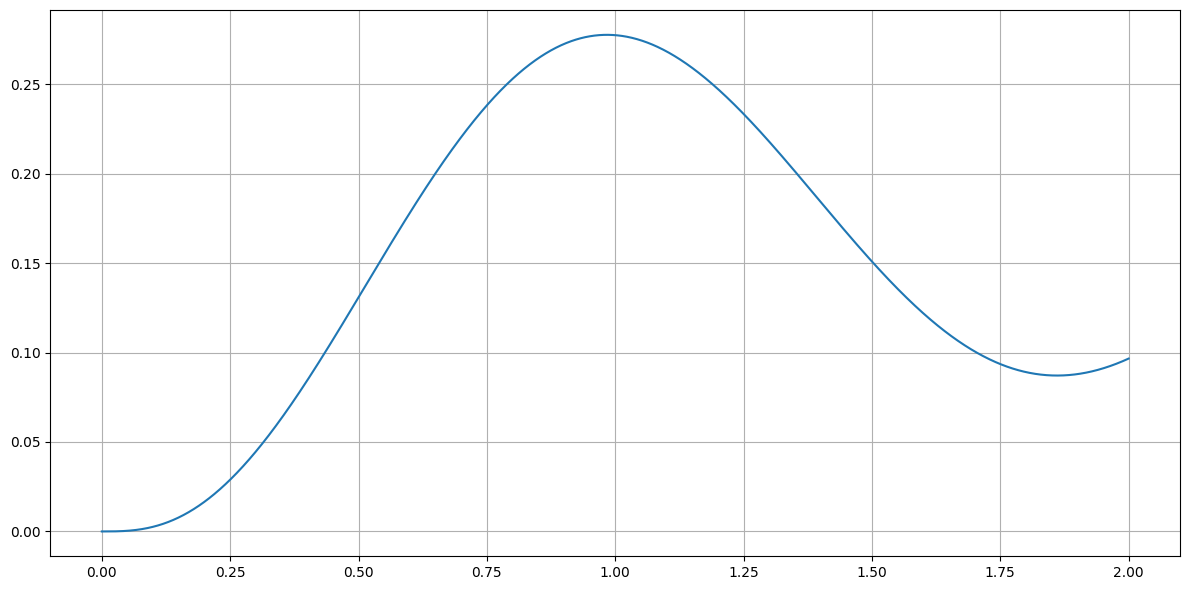

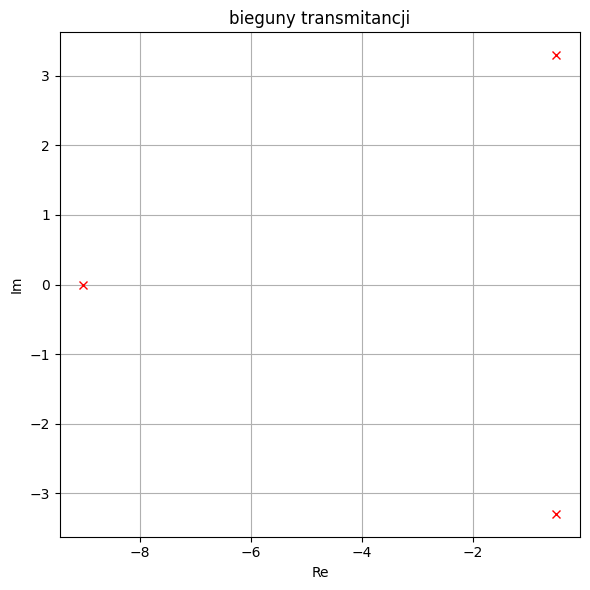

In [128]:
H0 = 1 /(s**3 + 10*s**2 + 20*s + 100)
kp = 20
#determine Hr
Hr = kp

#determine H
H = (Hr*H0)/(1+(Hr*H0))

#calculate and plot step response
fig, ax = plt.subplots(1, 1, figsize=default_figsize)
step = calculateStepResponseFromSympyH(H, time)
ax.plot(time, step)

ax.grid()
fig.tight_layout()
fig.show()

#calculate and plot poles
poles = np.roots(np.poly1d([1, 10, 20, 100]))
#poles = calculatePolesFromSympyH(H)
fig, ax = plt.subplots(1, 1, figsize=poles_figsize)
ax.plot(poles.real, poles.imag,'rx')
ax.set_title("bieguny transmitancji")
ax.set_xlabel("Re")
ax.set_ylabel("Im") 
ax.grid()
fig.tight_layout()
fig.show()

--- 
## 6. Pytanie
--- 
Czy regulator, który ma takie ustawienia, że sprawnie reguluje temperaturę w takim kurniku:  
<img src=" 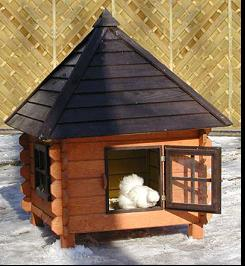"/>  
Będzie równie dobrze regulował temperaturę w takim kurniku?  
<img src=" 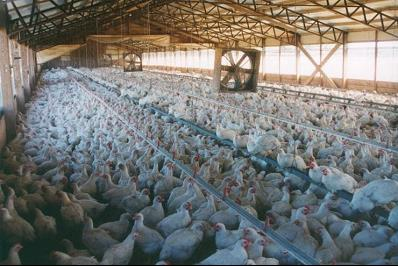"/>



---- 
## 7. Zadanie dodatkowe
---- 
Ugotuj rosół z kury